In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
from ipywidgets import interact_manual
from wave1D import functional, mesh, operator, propagator, multiscale

% matplotlib inline

# Example 0

$$ \lambda = \dfrac{1}{20} = 0.05 $$

$$ h = \dfrac{\lambda}{25} = 0.0025 $$

$$ L = 2 = 40 \lambda = 1000 h $$

In [2]:
# input data.
h = 0.0025
msh = mesh.make_mesh_from_npt(0.0, 2.0, (2.0 / h + 1))

# exact solution.
u0_exact = lambda t: functional.gated_cosine(msh-0.15 + t, 40, 0.05)
solution = lambda t: 0.5 * (u0_exact(t) + u0_exact(-t))

# FE operators.
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
propa.set_timestep(propa.get_cfl())

# run.
@interact_manual
def plot_step(steps=(1, 10)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.plot(msh, solution(propa.time))
    plt.ylim(-0.6, 0.6)

interactive(children=(IntSlider(value=5, description=u'steps', max=10, min=1), Button(description=u'Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

# Example 1

$$ \lambda = \dfrac{1}{20} = 0.05 $$
$$ \lambda_c = \dfrac{1}{40} = \dfrac{\lambda}{2} = 0.025 $$ 
$$ h = \dfrac{\lambda}{25} = 2 \dfrac{\lambda_c}{25} = 0.0025 $$
$$ L = 2 = \dfrac{40}{\lambda} = 1000 h $$


(time step, time) :
[ 0.00126839] [ 1.26839373]


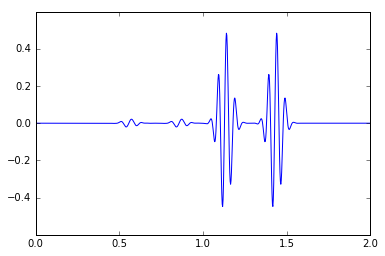

In [18]:
# input data.
h = 0.0025
msh = mesh.make_mesh_from_npt(0.0, 2.0, (2.0 / h + 1))
velocity = 4.0 * np.abs(functional.gated_cosine(msh-1.0, 80, 0.025)) + 1.0
plt.plot(msh, velocity)

# FE operators.
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh, velocity)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
propa.set_timestep(propa.get_cfl())

plt.figure()
@interact_manual
def plot_step(steps=(1, 100)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.ylim(-0.6, 0.6)

 # Example 2
 
$$ \lambda = \dfrac{1}{20} = 0.05 $$

$$ \lambda_c = \dfrac{\lambda}{200} = \dfrac{1}{4000} = 0.00025 $$

$$ h = \dfrac{\lambda_c}{10} = 2.5e-05 $$

$$ H = \dfrac{\lambda}{50} = 0.001 $$

## Comparing with homogeneous exact solution

(time step, time) :
1e-05 1.7


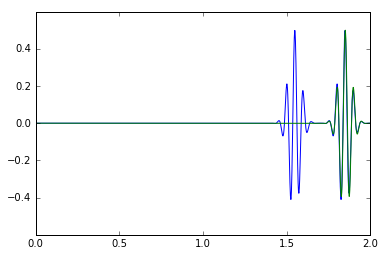

In [19]:
# meshes.
H = 0.001
h = 2.5e-05
msh_H0 = mesh.make_mesh_from_npt(0.0, 1.0, (1.0 / H + 1))
msh_h = mesh.make_mesh_from_npt(1.0, 1.0 + H, (H / h + 1))
msh_H1 = mesh.make_mesh_from_npt(1.0 + H, 2.0, (1.0 / H + 1))

# fusing meshes.
msh_H0_h = mesh.fuse_meshes(msh_H0, msh_h)
msh = mesh.fuse_meshes(msh_H0_h, msh_H1)

# exact homogeneous solution
u0_exact = lambda t: functional.gated_cosine(msh-0.15 + t, 40, 0.05)
solution = lambda t: 0.5 * (u0_exact(t) + u0_exact(-t))

# FE operators.
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
propa.set_timestep(1e-5)

plt.figure()
@interact_manual
def plot_step(steps=(1, 10000)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.plot(msh, solution(propa.time))
    plt.ylim(-0.6, 0.6)

## Using homogeneous velocity and constant mesh

(time step, time) :
1e-05 1.55


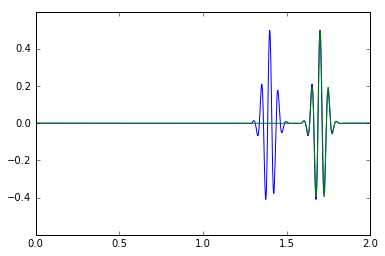

In [20]:
# mesh
H = 0.001
msh = mesh.make_mesh_from_npt(0., 2.0, (2.0 / H + 1))

# exact homogeneous solution
u0_exact = lambda t: functional.gated_cosine(msh-0.15 + t, 40, 0.05)
solution = lambda t: 0.5 * (u0_exact(t) + u0_exact(-t))

# FE operators.
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
propa.set_timestep(1e-5)

plt.figure()
@interact_manual
def plot_step(steps=(1, 10000)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.plot(msh, solution(propa.time))
    plt.ylim(-0.6, 0.6)

## Results for inhomogeneous velocity and non constant mesh

(time step, time) :
[  1.52533585e-05] [ 0.07626679]


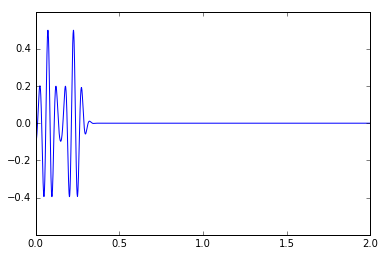

In [23]:
# meshs.
H = 0.001
h = 2.5e-05
msh_H0 = mesh.make_mesh_from_npt(0.0, 1.0, (1.0 / H + 1))
msh_h = mesh.make_mesh_from_npt(1.0, 1.0 + H, (H / h + 1))
msh_H1 = mesh.make_mesh_from_npt(1.0 + H, 2.0, (1.0 / H + 1))

# fusing meshes.
msh_H0_h = mesh.fuse_meshes(msh_H0, msh_h)
msh = mesh.fuse_meshes(msh_H0_h, msh_H1)

# exact homogeneous solution
u0_exact = lambda t: functional.gated_cosine(msh-0.15 + t, 40, 0.05)

# velocity.
velocity = np.abs(2.0 * functional.gated_cosine(msh-(1.0 + H / 2), 4000, 0.00025)) + 1.0
plt.plot(msh, velocity)
plt.figure()
plt.plot(msh, velocity)
plt.xlim(1.0, 1.0 + H)
plt.figure()

# FE operators.
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh, velocity)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
propa.set_timestep(propa.get_cfl())

plt.figure()
@interact_manual
def plot_step(steps=(1, 10000)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.ylim(-0.6, 0.6)

# Multiscale propagator

## Comparing with standard FEM

In [12]:
# macro mesh.
H = 0.001
msh_H = mesh.make_mesh_from_npt(0.0, 2.0, (2.0 / H + 1))
u0_exact_H = lambda t: functional.gated_cosine(msh_H-0.15 + t, 40, 0.05)

# micro mesh & data
h = 2.5e-05
msh_h = mesh.make_mesh_from_npt(1.0, 1.0 + H, (H / h + 1))
velocity_h = np.abs(2.0 * functional.gated_cosine(msh_h-(1.0 + H / 2), 4000, 0.0002)) + 1.0

# Building ms local basis.
stiffness_h = operator.assemble_p1_stiffness(msh_h, velocity_h)
mass_h = operator.assemble_p1_mass(msh_h)
ms_basis0, ms_basis1 = multiscale.get_multiscale_p1_basis(stiffness_h)

# Building ms local operator.
local_ms_mass = multiscale.assemble_multiscale_p1_local_mass(mass_h, ms_basis0, ms_basis1)
local_ms_stiffness = multiscale.assemble_multiscale_p1_local_stiffness(stiffness_h, ms_basis0, ms_basis1)

# Building ms local operators.
local_ms_masses = {}
local_ms_stiffnesses = {}
for ie_h in range(0, mesh.get_mesh_nelem(msh_H), 150):
    local_ms_masses[ie_h] = local_ms_mass
    local_ms_stiffnesses[ie_h] = local_ms_stiffness

# Assembling ms operators.
ms_mass = multiscale.assemble_multiscale_p1_mass(msh_H, local_ms_masses)
ms_mass_inv = scipy.sparse.linalg.inv(ms_mass)
ms_stiffness = multiscale.assemble_multiscale_p1_stiffness(msh_H, local_ms_stiffnesses)

# micro mesh and velocity
msh = mesh.make_mesh_from_npt(0.0, 2.0, (2.0 / h + 1))
u0_exact = lambda t: functional.gated_cosine(msh-0.15 + t, 40, 0.05)
velocity = np.ones_like(msh)
for e in range(0, mesh.get_mesh_nelem(msh_H), 150):
    velocity += np.abs(2.0 * functional.gated_cosine(msh-(e * H + H / 2), 4000, 0.0002))

# Assempling operators
mass = operator.assemble_p1_mass(msh)
mass_inv = scipy.sparse.diags(1.0 / mass)
stiffness = operator.assemble_p1_stiffness(msh, velocity)

# propagator.
propa = propagator.LeapFrog(mass, mass_inv, stiffness)
propa.set_init_cond(u1=u0_exact(0), u2=u0_exact(0))
cfl = propa.get_cfl()
propa.set_timestep(cfl)

# ms propagator.
ms_propa = propagator.LeapFrog(ms_mass, ms_mass_inv, ms_stiffness)
ms_propa.set_init_cond(u1=u0_exact_H(0), u2=u0_exact_H(0))
ms_propa.set_timestep(cfl)

ms_cfl = ms_propa.get_cfl()
print "(cfl, ms_cfl, ratio) :"
print cfl, ms_cfl, ms_cfl / cfl

plt.figure()
@interact_manual
def plot_step(steps=(1, 10000)):
    for _ in range(steps):
        propa.forward()
        propa.swap()
        
        ms_propa.forward()
        ms_propa.swap()
        
    print "(time step, time) :"
    print propa.ts, propa.time
        
    plt.plot(msh, propa.u1)
    plt.plot(msh_H, ms_propa.u1)
    plt.ylim(-0.6, 0.6)

(cfl, ms_cfl, ratio) :
[1.52905234e-05] [0.00064847] [42.40962445]


interactive(children=(IntSlider(value=5000, description=u'steps', max=10000, min=1), Button(description=u'Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

## Evolution of discrete energy

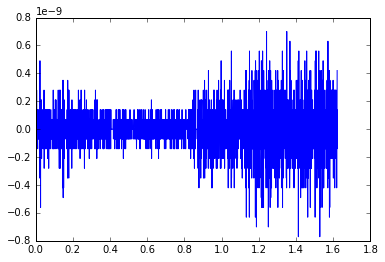

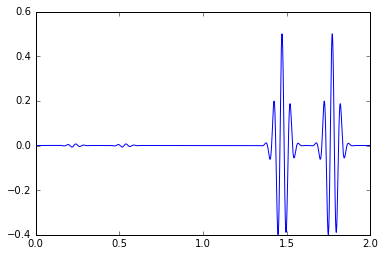

In [38]:
# macro mesh.
H = 0.001
msh_H = mesh.make_mesh_from_npt(0.0, 2.0, (2.0 / H + 1))
u0_exact_H = lambda t: functional.gated_cosine(msh_H-0.15 + t, 40, 0.05)

# micro mesh & data
h = 2.5e-05
msh_h = mesh.make_mesh_from_npt(1.0, 1.0 + H, (H / h + 1))
velocity_h = np.abs(2.0 * functional.gated_cosine(msh_h-(1.0 + H / 2), 4000, 0.0002)) + 1.0

# Building ms local basis.
stiffness_h = operator.assemble_p1_stiffness(msh_h, velocity_h)
mass_h = operator.assemble_p1_mass(msh_h)
ms_basis0, ms_basis1 = multiscale.get_multiscale_p1_basis(stiffness_h)

# Building ms local operator.
local_ms_mass = multiscale.assemble_multiscale_p1_local_mass(mass_h, ms_basis0, ms_basis1)
local_ms_stiffness = multiscale.assemble_multiscale_p1_local_stiffness(stiffness_h, ms_basis0, ms_basis1)

# Disctionnary of local masses
local_ms_masses = {}
local_ms_stiffnesses = {}
ie_h = int(1 / H)
local_ms_masses[ie_h] = local_ms_mass
local_ms_stiffnesses[ie_h] = local_ms_stiffness

# Assembling ms operators.
ms_mass = multiscale.assemble_multiscale_p1_mass(msh_H, local_ms_masses)
ms_mass_inv = scipy.sparse.linalg.inv(ms_mass)
ms_stiffness = multiscale.assemble_multiscale_p1_stiffness(msh_H, local_ms_stiffnesses)

# ms propagator.
ms_propa = propagator.LeapFrog(ms_mass, ms_mass_inv, ms_stiffness)
ms_propa.set_init_cond(u1=u0_exact_H(0), u2=u0_exact_H(0))
ms_propa.set_timestep(ms_propa.get_cfl())

# Computing H^1 norm overtime window
nstep = 2000
de = np.zeros(nstep)
time = np.zeros(nstep)

for i in range(0, nstep):
    ms_propa.forward()
    
    e0 = np.dot(ms_propa.u0 - ms_propa.u1, ms_mass * (ms_propa.u0 - ms_propa.u1)) / ms_propa.ts ** 2 \
    + np.dot(ms_propa.u0, ms_stiffness * ms_propa.u1)
    
    e1 = np.dot(ms_propa.u1 - ms_propa.u2, ms_mass * (ms_propa.u1 - ms_propa.u2)) / ms_propa.ts ** 2 \
    + np.dot(ms_propa.u1, ms_stiffness * ms_propa.u2)
    
    de[i] = (e0 - e1) / ms_propa.ts
    time[i] = ms_propa.time
    
    ms_propa.swap()
    
plt.plot(time, de)
plt.figure()
plt.plot(msh_H, ms_propa.u1)

## Multiple scatering